In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.colors import LogNorm
from numpy import pi, cos,sin
D_003=132.2 # luminsity distance for z=0.03 this can also come from astropy


In [5]:
# Here is the source of interest as an example: 

#Mrk 421
RA_s=166.113808
DEC_s=38.208833	
z_s=0.03


R_s=z_s*D_003/0.03
X_s=R_s*cos(DEC_s*pi/180.)
Y_s=0.
H_s=R_s*sin(DEC_s*pi/180.)

In [7]:
#Read the catalog
hdul = fits.open('/scratch/garzilli/data/specObj-dr16.fits')
data = hdul[1].data

# Ra, Dec of sources
RA=data['PLUG_RA']
DEC=data['PLUG_DEC']

# redshifts
z=data['Z']
z_err=data['Z_ERR']

# classificaiton: GALAXY, etc....
cl=data['CLASS']

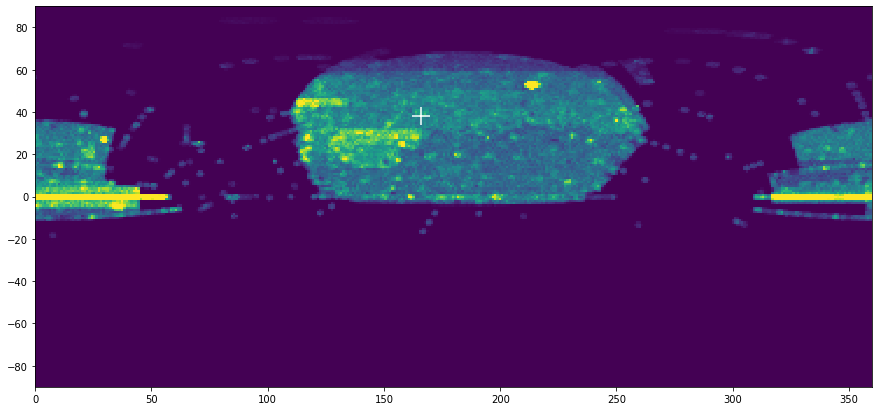

In [4]:
#Just to visualise the sky coverage, here is a coarse map of source distribution (our source of interest is the red cross):
fig = plt.figure(figsize=(15,7))
ra_b=np.linspace(0,360,360)
dec_b=np.linspace(-90,90,180)
plt.hist2d(RA,DEC,bins=([ra_b,dec_b]),vmax=1000)
plt.scatter([RA_s],[DEC_s],marker='+',color='white',s=300)


In [8]:
# 3d-rendering, we choose the source position as the origin of coordinates
R=z*D_003/0.03
dRA=RA-RA_s
H=R*sin(DEC*pi/180.)
X=R*cos(DEC*pi/180.)
Y=X*sin(dRA*pi/180.)
X=X*cos(dRA*pi/180.)
dX=X-X_s
dY=Y-Y_s
dH=H-H_s

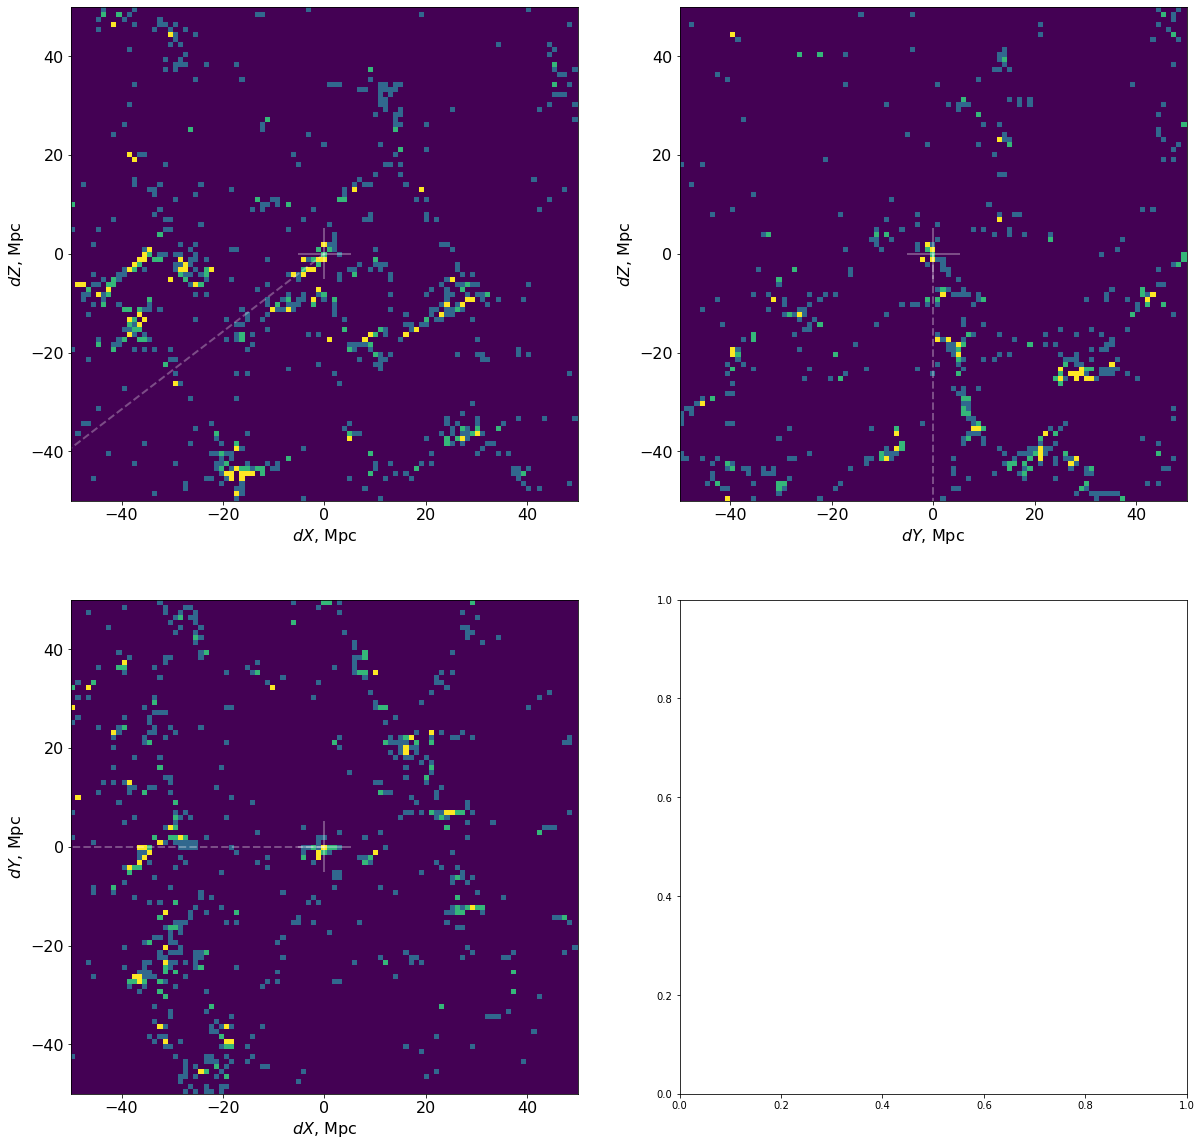

In [6]:
#Now to visualise LSS around the source, we can plot XZ, XY and YZ slices of thickness 2 Mpc:
fig, axs = plt.subplots(2, 2,figsize=(20,20))
xbins=np.linspace(-50,50,100)
ybins=np.linspace(-50,50,100)

axs[0,0].hist2d(dX,dH,weights=((dY*dY<4.)*(cl=='GALAXY')),bins=([xbins,ybins]),vmax=3)
axs[0,0].plot([-5,5],[0,0],color='white',linewidth=2,alpha=0.3)
axs[0,0].plot([0,0],[-5,5],color='white',linewidth=2,alpha=0.3)
axs[0,0].plot([0,-X_s],[0,-H_s],color='white',linewidth=2,alpha=0.3,linestyle='dashed')
axs[0,0].set_xlabel('$dX$, Mpc',fontsize=16)
axs[0,0].set_ylabel('$dZ$, Mpc',fontsize=16)
axs[0,0].tick_params(labelsize = 16)

axs[0,1].hist2d(dY,dH,weights=((dX*dX<4.)*(cl=='GALAXY')),bins=([xbins,ybins]),vmax=3)
axs[0,1].plot([-5,5],[0,0],color='white',linewidth=2,alpha=0.3)
axs[0,1].plot([0,0],[-5,5],color='white',linewidth=2,alpha=0.3)
axs[0,1].plot([0,-Y_s],[0,-H_s],color='white',linewidth=2,alpha=0.3,linestyle='dashed')
axs[0,1].set_xlabel('$dY$, Mpc',fontsize=16)
axs[0,1].set_ylabel('$dZ$, Mpc',fontsize=16)
axs[0,1].tick_params(labelsize = 16)

axs[1,0].hist2d(dX,dY,weights=((dH*dH<4.)*(cl=='GALAXY')),bins=([xbins,ybins]),vmax=3)
axs[1,0].plot([-5,5],[0,0],color='white',linewidth=2,alpha=0.3)
axs[1,0].plot([0,0],[-5,5],color='white',linewidth=2,alpha=0.3)
axs[1,0].plot([0,-X_s],[0,-Y_s],color='white',linewidth=2,alpha=0.3,linestyle='dashed')
axs[1,0].set_xlabel('$dX$, Mpc',fontsize=16)
axs[1,0].set_ylabel('$dY$, Mpc',fontsize=16)
axs[1,0].tick_params(labelsize = 16)





In [ ]:
hdul = fits.open('/scratch/garzilli/data/photoRunAll-dr16.fits')
runlist=hdul[1].data
Run=runlist['RUN']
RunTime_MJD=runlist['MJD_REF']
RunTime_YYYY=runlist['DATESTRING']

Fields_start=runlist['STARTFIELD']
Fields_end=runlist['ENDFIELD']
hdul.close()

#there are runs with the same MJD 

51075.2332107 55153.06790925
23 1010 51459.28625595 51459.36074413 1.787716319959145


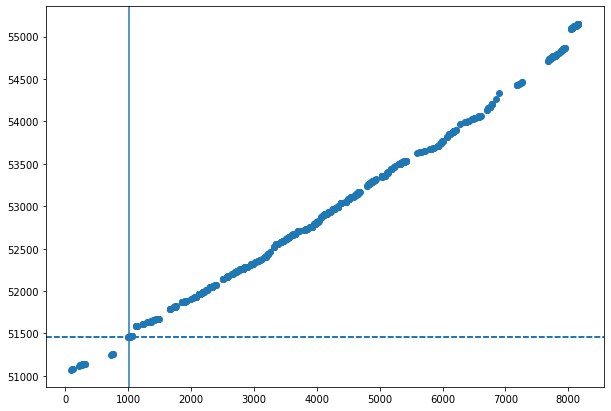

In [79]:
plt.figure(figsize=(10,7))
print(min(RunTime_MJD),max(RunTime_MJD))
plt.scatter(Run,RunTime_MJD)
plt.axvline(1010)
i=0
while(Run[i]<1010):
    i+=1
print(i,Run[i],RunTime_MJD[i],RunTime_MJD[i+1],(-RunTime_MJD[i]+RunTime_MJD[i+1])*24 )
#plt.xlim(970,1040)
#plt.ylim(51410,51470)

plt.axhline(51458,linestyle='dashed')
plt.axhline(51459,linestyle='dashed')
plt.axhline(51460,linestyle='dashed')




In [7]:
hdul = fits.open('/scratch/garzilli/data/frame-g-008162-4-0084.fits')

In [9]:
hdul[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4765227969.17 / 1st row Number of seconds since Nov 17 1858    
RA      =            333.38145 / 1st row RA of telescope boresight (deg)        
DEC     =            26.180899 / 1st row Dec of telescope boresight (degrees)   
SPA     =              74.803  / 1st row Cam col position angle wrt N (deg)     
IPA     =              15.44

In [16]:
data = hdul[0].data
print(data.shape)
print(np.amax(data),np.amin(data))

(1489, 2048)
179.5 -0.0690918


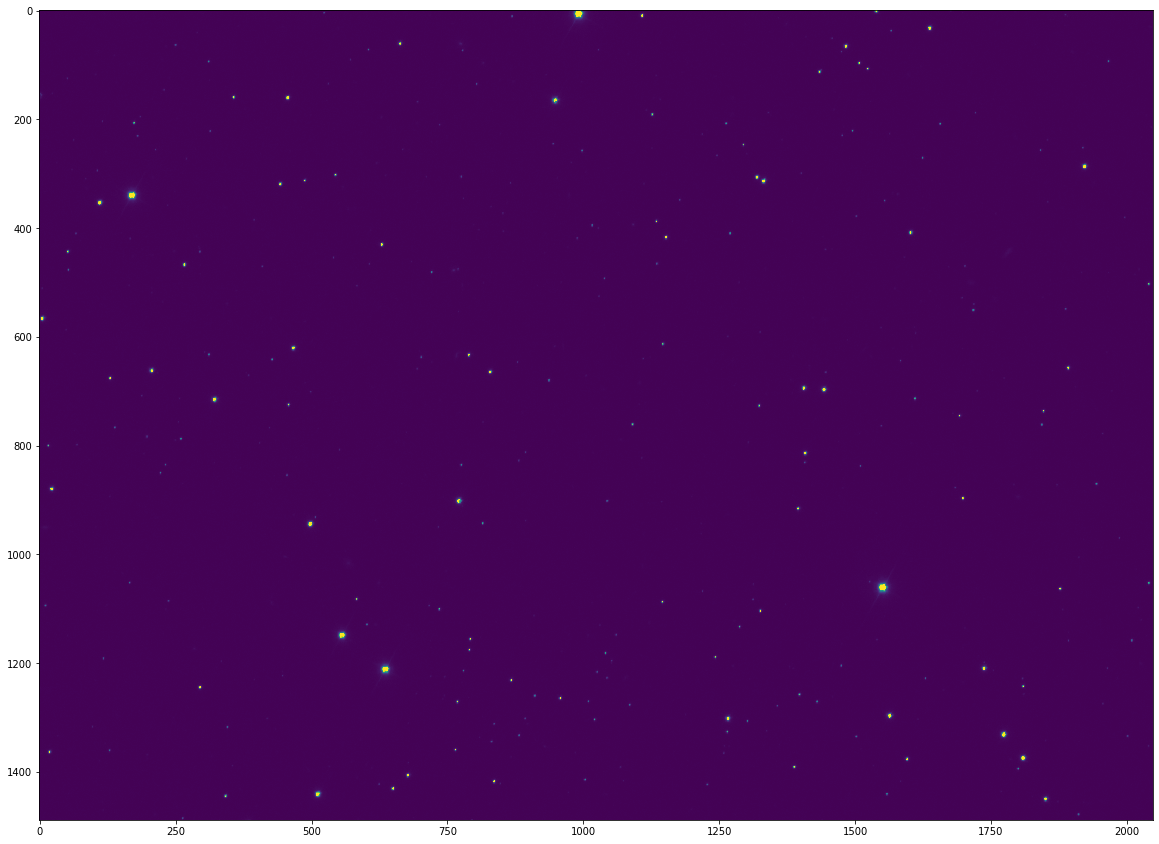

In [19]:
plt.figure(figsize=(20.48,14.89))
plt.imshow(data,vmax=10)

Run: 4469  Time 53052.25588652 MJD, run intervals: -24.370025279873516 hr 4.8584728800924495 hr


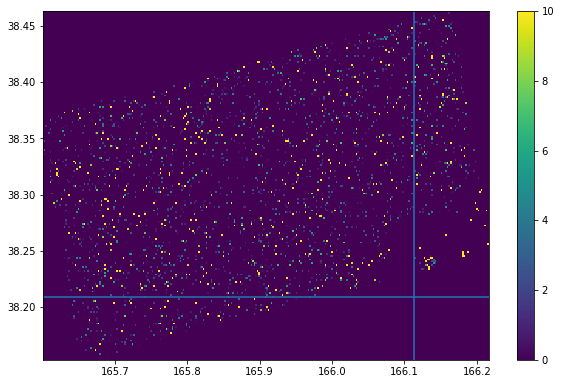

In [131]:
i=0
while(Run[i]<4469):
    i+=1
print('Run:',Run[i],' Time',RunTime_MJD[i],'MJD, run intervals:',(-RunTime_MJD[i]+RunTime_MJD[i-1])*24,'hr',(RunTime_MJD[i+1]-RunTime_MJD[i])*24,'hr' )



hdul=fits.open('photoObj-004469-3-0348.fits')
cat=hdul[1].data
OBJID=cat['OBJID']
FIELD=cat['FIELD']
RUN=cat['RUN']
RA=cat['RA']
DEC=cat['DEC']
L=cat['L']
B=cat['B']
MJD=cat['MJD']
PSFFLUX=cat['PSFFLUX']
PSFMAG=cat['PSFMAG']
hdul.close()
for i in range(349,351):
    fname='photoObj-004469-3-0'+str(i)+'.fits'
    hdul=fits.open(fname)
    cat=hdul[1].data
    OBJID=cat['OBJID']
    FIELD=cat['FIELD']
    RUN=cat['RUN']
    RA1=cat['RA']
    DEC1=cat['DEC']
    L=cat['L']
    B=cat['B']
    MJD=cat['MJD']
    PSFFLUX1=cat['PSFFLUX']
    PSFMAG1=cat['PSFMAG']
    hdul.close()
    RA=np.concatenate((RA,RA1))
    DEC=np.concatenate((DEC,DEC1))
    PSFFLUX=np.concatenate((PSFFLUX,PSFFLUX1))



ra_min=np.amin(RA)
ra_max=np.amax(RA)
dec_min=np.amin(DEC)
dec_max=np.amax(DEC)
pix_size=1/60./10. # say, one arcmin
dec_mid=(dec_min+dec_max)/2.
Nra=int((ra_max-ra_min)*cos(dec_mid*pi/180.)/pix_size)
Ndec=int((dec_max-dec_min)/pix_size)
ra_b=np.linspace(ra_min,ra_max,Nra)
dec_b=np.linspace(dec_min,dec_max,Ndec)


fig = plt.figure(figsize=(10.,10.*(Ndec/Nra)))
plt.hist2d(RA,DEC,bins=([ra_b,dec_b]),weights=PSFFLUX[:,4],vmax=10,vmin=0)
plt.colorbar()
plt.axhline(DEC_s)
plt.axvline(RA_s)
#plt.xlim(RA_s-0.1,RA_s+0.1)
#plt.ylim(DEC_s-0.1,DEC_s+0.1)



165.82179825614617 166.07424666585706 37.331296738230286 37.58342127873879
165.82179825614617 166.25827031008686 37.331296738230286 37.61219323855505
165.82179825614617 166.44605904302185 37.331296738230286 37.643502125065275
297 187
-2.0404863
165.82179825614617 166.44605904302185
37.331296738230286 37.643502125065275


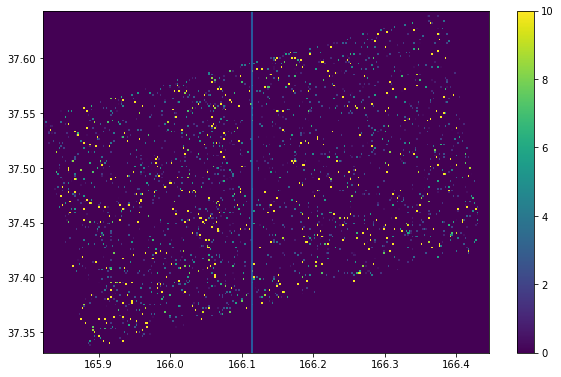

In [124]:
hdul=fits.open('/scratch/garzilli/data/photoObj-004469-1-0348.fits')
cat=hdul[1].data
OBJID=cat['OBJID']
FIELD=cat['FIELD']
RUN=cat['RUN']
RA=cat['RA']
DEC=cat['DEC']
L=cat['L']
B=cat['B']
MJD=cat['MJD']
PSFFLUX=cat['PSFFLUX']
PSFMAG=cat['PSFMAG']
hdul.close()
print(min(RA),max(RA),min(DEC),max(DEC))
for i in range(349,351):
    fname='photoObj-004469-1-0'+str(i)+'.fits'
    hdul=fits.open(fname)
    cat=hdul[1].data
    OBJID=cat['OBJID']
    FIELD=cat['FIELD']
    RUN=cat['RUN']
    RA1=cat['RA']
    DEC1=cat['DEC']
    L=cat['L']
    B=cat['B']
    MJD=cat['MJD']
    PSFFLUX1=cat['PSFFLUX']
    PSFMAG1=cat['PSFMAG']
    hdul.close()
    RA=np.concatenate((RA,RA1))
    DEC=np.concatenate((DEC,DEC1))
    PSFFLUX=np.concatenate((PSFFLUX,PSFFLUX1))

    print(min(RA),max(RA),min(DEC),max(DEC))


ra_min=np.amin(RA)
ra_max=np.amax(RA)
dec_min=np.amin(DEC)
dec_max=np.amax(DEC)
pix_size=1/60./10. # say, one arcmin
dec_mid=(dec_min+dec_max)/2.
Nra=int((ra_max-ra_min)*cos(dec_mid*pi/180.)/pix_size)
Ndec=int((dec_max-dec_min)/pix_size)
print(Nra,Ndec)
print(min(PSFFLUX[:,4]))
ra_b=np.linspace(ra_min,ra_max,Nra)
dec_b=np.linspace(dec_min,dec_max,Ndec)


fig = plt.figure(figsize=(10.,10.*(Ndec/Nra)))
plt.hist2d(RA,DEC,bins=([ra_b,dec_b]),weights=PSFFLUX[:,4],vmax=10,vmin=0)
plt.colorbar()
print(ra_min,ra_max)
print(dec_min,dec_max)
plt.axhline(DEC_s)
plt.axvline(RA_s)
#plt.xlim(RA_s-0.1,RA_s+0.1)
#plt.ylim(DEC_s-0.1,DEC_s+0.1)



290 186
-2.3242197
165.60047783403684 166.21685672295013
38.152935810496 38.46338347680805


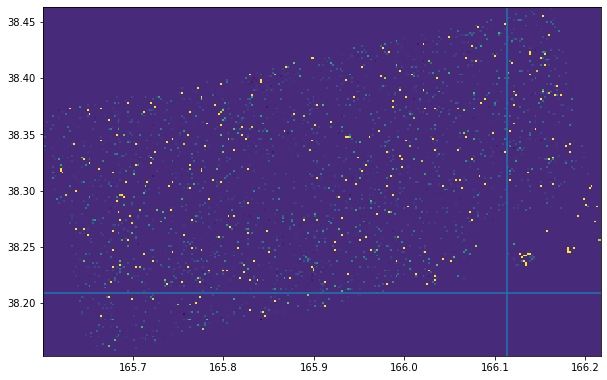

51459 51459


(array([  0.,   0.,   0.,   0.,   0., 741.,   0.,   0.,   0.,   0.]),
 array([51458.5, 51458.6, 51458.7, 51458.8, 51458.9, 51459. , 51459.1,
        51459.2, 51459.3, 51459.4, 51459.5]),
 <a list of 10 Patch objects>)

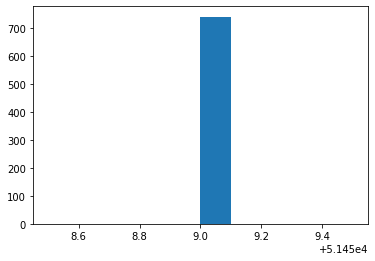

In [44]:
print(min(MJD),max(MJD))
plt.hist(MJD)